### 1. Importing Libraries


In [2]:
#!pip install seaborn
# 'os' module provides functions for interacting with the operating system 
import os

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore") 

### 2. Importing and Exploration of the dataset


In [3]:
# loading the data and setting the unique client_id as the index::

df = pd.read_csv("loans.csv")

df.set_index("client_id", inplace=True)

print(df)



          loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
client_id                                                                   
46109          home        13672       0    10243  2002-04-16  2003-12-20   
46109        credit         9794       0    10984  2003-10-21  2005-07-17   
46109          home        12734       1    10990  2006-02-01  2007-07-05   
46109          cash        12518       1    10596  2010-12-08  2013-05-05   
46109        credit        14049       1    11415  2010-07-07  2012-05-21   
...             ...          ...     ...      ...         ...         ...   
26945         other        12963       0    10330  2001-11-26  2004-06-11   
26945        credit         1728       1    10248  2004-01-27  2005-06-21   
26945         other         9329       0    10154  2001-12-17  2004-07-22   
26945          home         4197       0    10333  2003-10-16  2005-07-10   
26945          home         3643       0    11434  2010-03-24  2011-12-22   

In [4]:
# # showing the first 5 rows of the dataset:

print(df.head(5))

          loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
client_id                                                                   
46109          home        13672       0    10243  2002-04-16  2003-12-20   
46109        credit         9794       0    10984  2003-10-21  2005-07-17   
46109          home        12734       1    10990  2006-02-01  2007-07-05   
46109          cash        12518       1    10596  2010-12-08  2013-05-05   
46109        credit        14049       1    11415  2010-07-07  2012-05-21   

           rate  
client_id        
46109      2.15  
46109      1.25  
46109      0.68  
46109      1.24  
46109      3.13  


In [5]:
# To check the Dimensions of the dataset:

print(df.shape)


(443, 7)


In [6]:
# Checking the info of the data:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB
None


### 3. Checking the datatypes of the columns


In [7]:
print(df.dtypes)

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object


### 4. Converting the data types of columns

    - loan_id to object
    - repaid to category dtype
    - loan_start and loan_end to date type


In [8]:
# loan_id:

df["loan_id"] = df["loan_id"].astype("object")

# repaid:
df["repaid"] = df["repaid"].astype("category")

In [9]:
# loan_start:

df["loan_start"] = pd.to_datetime(df["loan_start"])
# loan_end:

df["loan_end"] = pd.to_datetime(df["loan_end"])


#### Checking the datatypes again:


In [10]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

### 5. Summary Statistics of the data


In [21]:
# Summary Statistics for Numerical data:

ss = df.describe()

print(ss)



        loan_amount                     loan_start  \
count    443.000000                            443   
mean    7982.311512  2007-08-02 12:56:53.092550912   
min      559.000000            2000-01-26 00:00:00   
25%     4232.500000            2003-10-19 00:00:00   
50%     8320.000000            2007-03-10 00:00:00   
75%    11739.000000            2011-07-31 00:00:00   
max    14971.000000            2014-11-11 00:00:00   
std     4172.891992                            NaN   

                            loan_end        rate  
count                            443  443.000000  
mean   2009-08-23 11:35:37.246049536    3.217156  
min              2001-08-02 00:00:00    0.010000  
25%              2005-09-12 12:00:00    1.220000  
50%              2009-03-19 00:00:00    2.780000  
75%              2013-09-11 12:00:00    4.750000  
max              2017-05-07 00:00:00   12.620000  
std                              NaN    2.397168  


In [12]:
# Summary Statistics for Categorical data:


ssc = df.describe(include=['object', 'category'])

print(ssc)

       loan_type  repaid  loan_id
count        443     443      443
unique         4       2      443
top         home       1    11434
freq         121     237        1


### 6. Missing Values


In [19]:
# use isnull().sum() to check for missing values 

missing_values = df.isnull().sum()

print(missing_values)



loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


---


### 7. Outliers Treatment

To check for the presence of outliers, we plot Boxplot.


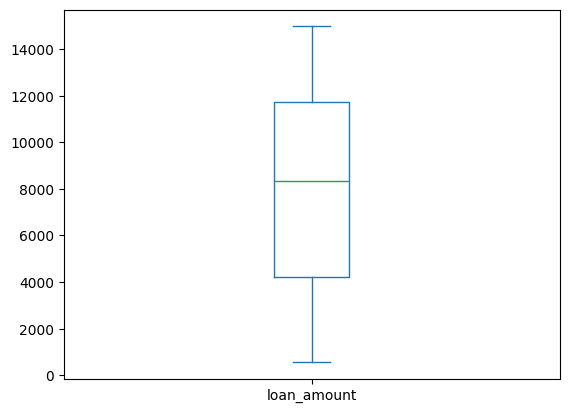

In [14]:
# For loan_amount 
df['loan_amount'].plot(kind='box')
plt.show()

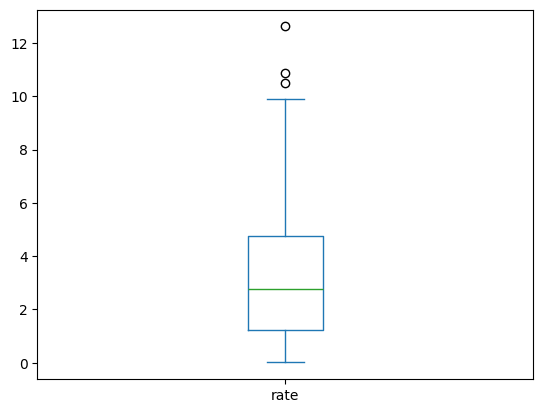

In [15]:
# For rate 
df['rate'].plot(kind='box')
plt.show()

### 8. Transformation

### 8a. SQRT transformation


In [16]:
#perform square root transformation of rate column and store it a new column named SQRT_RATE

In [27]:
df['SQRT_RATE'] = df['rate'].pow(0.5)

In [24]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181


In [28]:
#checking the skewness, kurtosis between the original and transformed data:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))

print('')

print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT transformed data is -0.6318437642052039


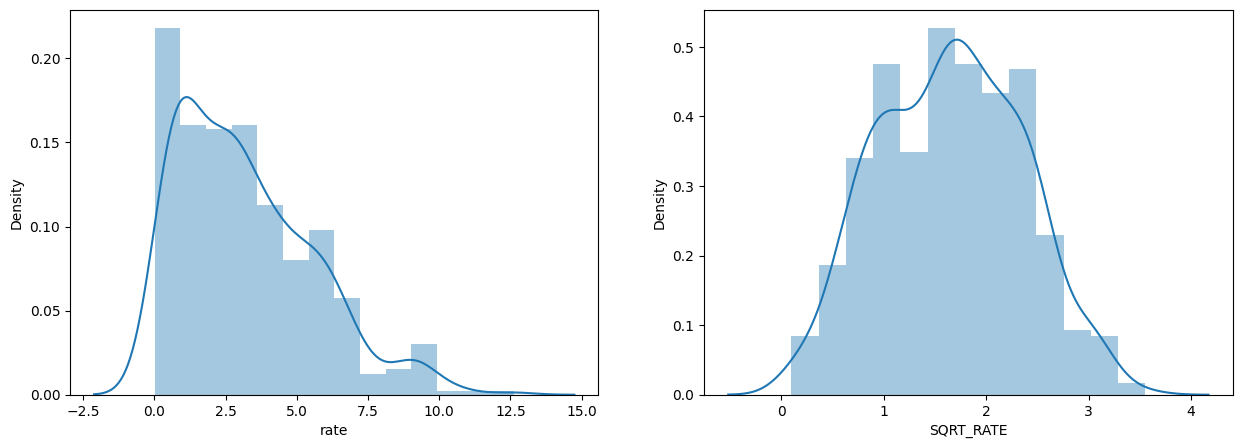

In [30]:
# plotting the distribution

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['SQRT_RATE'], ax=axes[1])

plt.show()


### 8b. Log Transformation


In [32]:
# Apply Log transformation of the rate column by taking log of column and storing it in Log Rateee

df['Log Rate'] = df['rate'].apply(lambda x: np.log(x))

In [33]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,Log Rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033


In [34]:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['Log Rate'].skew()))

print('')


print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))
print("The kurtosis of the LOG transformed data is {}".format(df['Log Rate'].kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862
The skewnss of the LOG transformed data is -1.5943217626331552

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT transformed data is -0.6318437642052039
The kurtosis of the LOG transformed data is 4.157026150198228


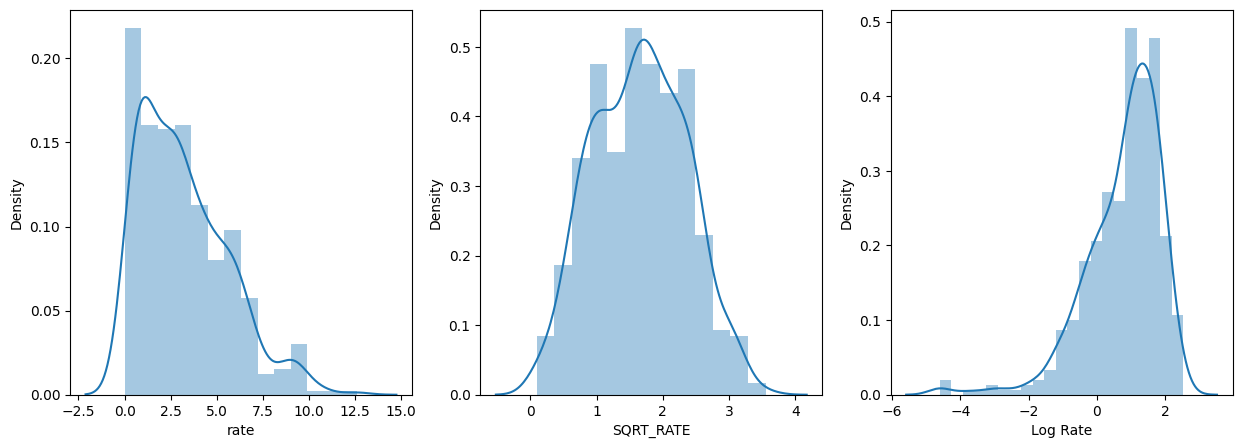

In [35]:
# plot the graph:

fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['SQRT_RATE'], ax=axes[1])
sns.distplot(df['Log Rate'], ax=axes[2])

plt.show()

In [36]:
## Using Lambda function :

df['LOG_Rate'] = df['rate'].apply(lambda x:np.log(x))

In [37]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,Log Rate,LOG_Rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033,1.141033


---


### Outliers Treatment using Capping Approach

### 1) Z-Score approach to treat Outliers:

All the values above 3 standard deviation and below -3 standard deviation are outliers and can be removed


In [38]:
# loading the dataset and setting client id as index

df1 = pd.read_csv('loans.csv', index_col = 'client_id')
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [51]:
# Apply Z-Score Transformation on the rate column and store it in a new column named ZR

df1['ZR'] = (df1['rate'] - df1['rate'].mean()) / df1['rate'].std()

---


### 2) IQR Method to treat Outliers:

All the values below Q1 - 1.5*IQR and values above Q3 + 1.5*IQR are outliers and can be removed.


In [52]:
# Implement IQR method to Detect outliers and their ranges

# Step 1: Calculate Q1 and Q3
Q1 = df1['rate'].quantile(0.25)
Q3 = df1['rate'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Determine bounds
LC = Q1 - 1.5 * IQR
UC = Q3 + 1.5 * IQR

# Step 4: Remove outliers

print("Original DataFrame shape:", df1.shape)


Original DataFrame shape: (443, 8)


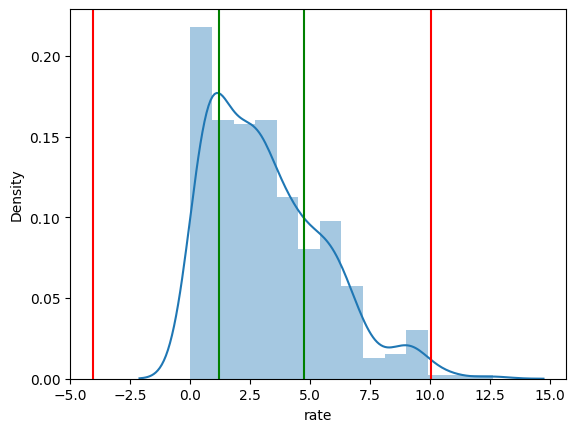

In [53]:
## Plot

sns.distplot(df1.rate)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [63]:
# Find count of Outliers wrt IQR

df4 = df1[(df1['rate'] < LC) | (df1['rate'] > UC)]

# Step 4: Count outliers
df4shape = df4.shape[0]

print(df4shape)


3


In [64]:
# Remove the outliers

df3 = df1[(df1['rate'] >= LC) & (df1['rate'] <= UC)]

df3


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445174
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.820617
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.058397
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.824788
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036358
...,...,...,...,...,...,...,...,...
26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46,-0.315854
26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27,0.856362
26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65,1.014883


In [67]:
## Store the clean data wrt IQR:

df3


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445174
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.820617
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.058397
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.824788
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036358
...,...,...,...,...,...,...,...,...
26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46,-0.315854
26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27,0.856362
26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65,1.014883


In [65]:
df3.shape

(440, 8)

In [66]:
df4.shape

(3, 8)

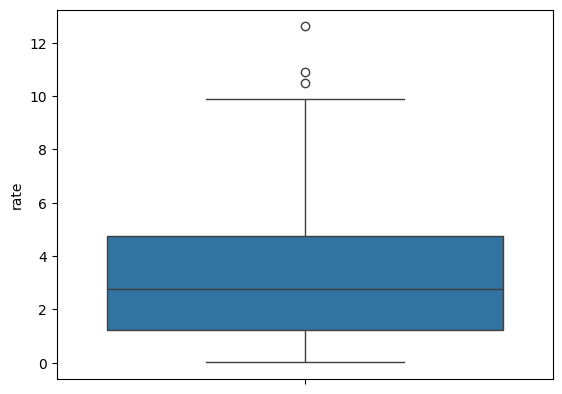

In [68]:
## Box Plot for rate--- based on IQR Method

sns.boxplot(df1.rate)
plt.show()

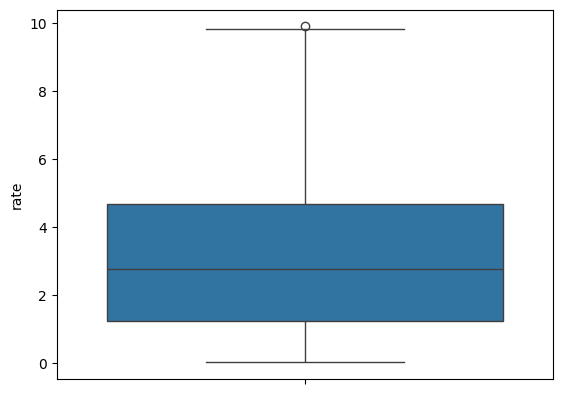

In [69]:
# Box Plot for rate --- based on Z-score cleaned data 

sns.boxplot(df3.rate)
plt.show()

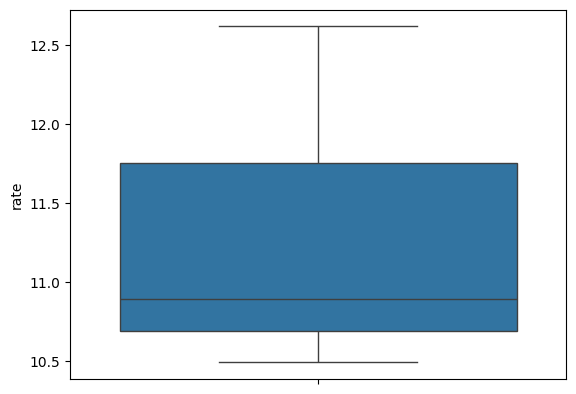

In [70]:
# Box Plot for rate --- based on IQR cleaned data 

sns.boxplot(df4.rate)
plt.show()

---


### 9. Scaling the Numerical Features

There are two ways to scale the data:

1. Standardization (Z-Score)\
2. Normalization: Min Max Scalar

Both can by done manually as well as have in-built functions in sklearn. Will demonstrate both.


### 9a. Standardization (Z-Score)

Scales the data using the formula (x-mean)/standard deviation

#### Manually:


In [77]:
# For Rate:

mean_rate = df3['rate'].mean()
std_rate = df3['rate'].std()

df3['Standardized Rate'] = (df3['rate'] - mean_rate) / std_rate

# Check the result
print(df3[['rate', 'Standardized Rate']].head())


           rate  Standardized Rate
client_id                         
46109      2.15          -0.438406
46109      1.25          -0.828363
46109      0.68          -1.075336
46109      1.24          -0.832696
46109      3.13          -0.013786


In [76]:
# For Loan_amount:
mean_loan_amount = df3['loan_amount'].mean()
std_loan_amount = df3['loan_amount'].std()

df3['Standardized Loan Amount'] = (df3['loan_amount'] - mean_loan_amount) / std_loan_amount

# Check the result
print(df3[['loan_amount', 'Standardized Loan Amount']].head())

           loan_amount  Standardized Loan Amount
client_id                                       
46109            13672                  1.357792
46109             9794                  0.429916
46109            12734                  1.133360
46109            12518                  1.081678
46109            14049                  1.447996


In [74]:
# Step 1 : transform using Z-score
# Step 1: Standardize the 'rate' column using Z-score
mean_rate = df3['rate'].mean()
std_rate = df3['rate'].std()
df3['Standardized Rate'] = (df3['rate'] - mean_rate) / std_rate

# Step 2: Standardize the 'loan_amount' column using Z-score
mean_loan_amount = df3['loan_amount'].mean()
std_loan_amount = df3['loan_amount'].std()
df3['Standardized Loan Amount'] = (df3['loan_amount'] - mean_loan_amount) / std_loan_amount

# Check the results
print(df3[['rate', 'Standardized Rate', 'loan_amount', 'Standardized Loan Amount']].head())




           rate  Standardized Rate  loan_amount  Standardized Loan Amount
client_id                                                                
46109      2.15          -0.438406        13672                  1.357792
46109      1.25          -0.828363         9794                  0.429916
46109      0.68          -1.075336        12734                  1.133360
46109      1.24          -0.832696        12518                  1.081678
46109      3.13          -0.013786        14049                  1.447996


In [75]:
df3.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR,Standardized Rate,Standardized Loan Amount
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445174,-0.438406,1.357792
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.820617,-0.828363,0.429916
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.058397,-1.075336,1.133360
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.824788,-0.832696,1.081678
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036358,-0.013786,1.447996


### 6b. Normalization: Min Max Scalar

Scales the data using the formula (x - min)/(max - min)

#### Manually:


In [78]:
# ForeRate:

min_rate = df3['rate'].min()
max_rate = df3['rate'].max()

df3['Normalized Rate'] = (df3['rate'] - min_rate) / (max_rate - min_rate)

# Check the result
print(df3[['rate', 'Normalized Rate']].head())


           rate  Normalized Rate
client_id                       
46109      2.15         0.216162
46109      1.25         0.125253
46109      0.68         0.067677
46109      1.24         0.124242
46109      3.13         0.315152


---


### 10. Encoding the Categorical Features

There are two ways to encode the categorical data into dummyvariables. Using:

1. pd.get_dummies\
2. sklearn's in-built function of OneHotEncoder and LabelEncoder


In [79]:
# Loans data:

df_encoded_dummies = pd.get_dummies(df3, columns=['repaid'], drop_first=False)

# Check the result
print(df_encoded_dummies.head())

          loan_type  loan_amount  loan_id  loan_start    loan_end  rate  \
client_id                                                                 
46109          home        13672    10243  2002-04-16  2003-12-20  2.15   
46109        credit         9794    10984  2003-10-21  2005-07-17  1.25   
46109          home        12734    10990  2006-02-01  2007-07-05  0.68   
46109          cash        12518    10596  2010-12-08  2013-05-05  1.24   
46109        credit        14049    11415  2010-07-07  2012-05-21  3.13   

                 ZR  Standardized Rate  Standardized Loan Amount  \
client_id                                                          
46109     -0.445174          -0.438406                  1.357792   
46109     -0.820617          -0.828363                  0.429916   
46109     -1.058397          -1.075336                  1.133360   
46109     -0.824788          -0.832696                  1.081678   
46109     -0.036358          -0.013786                  1.447996  

In [80]:
# Repaid is also a categoriy columns and creating dummies for loan_type

df_encoded_dummies = pd.get_dummies(df3, columns=['repaid', 'loan_type'], drop_first=False)

# Check the result
print(df_encoded_dummies.head())


           loan_amount  loan_id  loan_start    loan_end  rate        ZR  \
client_id                                                                 
46109            13672    10243  2002-04-16  2003-12-20  2.15 -0.445174   
46109             9794    10984  2003-10-21  2005-07-17  1.25 -0.820617   
46109            12734    10990  2006-02-01  2007-07-05  0.68 -1.058397   
46109            12518    10596  2010-12-08  2013-05-05  1.24 -0.824788   
46109            14049    11415  2010-07-07  2012-05-21  3.13 -0.036358   

           Standardized Rate  Standardized Loan Amount  Normalized Rate  \
client_id                                                                 
46109              -0.438406                  1.357792         0.216162   
46109              -0.828363                  0.429916         0.125253   
46109              -1.075336                  1.133360         0.067677   
46109              -0.832696                  1.081678         0.124242   
46109              -0.01

### 1) pd.get_dummies approach:


In [82]:
dummy_cat = pd.get_dummies(df3['loan_type'], drop_first = True)
dummy_cat.head()

# drop_first = True drops the first column for each feature

,credit,home,other
client_id,,,
46109,False,True,False
46109,True,False,False
46109,False,True,False
46109,False,False,False
46109,True,False,False


---


### 11. Creating new Derived Features

We can use the loan_start and loan_end features to calculate the tenure of the loan


In [83]:
df3['loan_start'] = pd.to_datetime(df3['loan_start'])
df3['loan_end'] = pd.to_datetime(df3['loan_end'])

# Calculate loan tenure in days
df3['loan_tenure'] = (df3['loan_end'] - df3['loan_start']).dt.days
df3['loan_tenure'] = df3['loan_tenure'].astype('int64')

# output
df3.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR,Standardized Rate,Standardized Loan Amount,Normalized Rate,loan_tenure
client_id,,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445174,-0.438406,1.357792,0.216162,613
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.820617,-0.828363,0.429916,0.125253,635
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.058397,-1.075336,1.133360,0.067677,519
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.824788,-0.832696,1.081678,0.124242,879
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036358,-0.013786,1.447996,0.315152,684


---
